In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import h5py
from skimage.measure import label, regionprops

In [2]:
df_track_outp_bayes = pd.read_csv('../../midap-datasets/segmentation/Guga/pos1/pos1/TXRED/track_output/track_output_bayesian.csv', index_col= 'frame')
df_track_outp_delta = pd.read_csv('../../midap-datasets/segmentation/Guga/pos1/pos1/TXRED/track_output/track_output_delta.csv', index_col= 'frame')

In [3]:
hf_track_outp_bayes = h5py.File('../../midap-datasets/segmentation/Guga/pos1/pos1/TXRED/track_output/label_stack_bayesian.h5', 'r')
label_stack_bayes = np.array(hf_track_outp_bayes.get('label_stack'))
hf_track_outp_bayes.close()

hf_track_outp_delta = h5py.File('../../midap-datasets/segmentation/Guga/pos1/pos1/TXRED/track_output/label_stack_delta.h5', 'r')
label_stack_delta = np.array(hf_track_outp_delta.get('label_stack'))
hf_track_outp_delta.close()

## Cell area

Text(0.5, 1.0, 'Delta tracking')

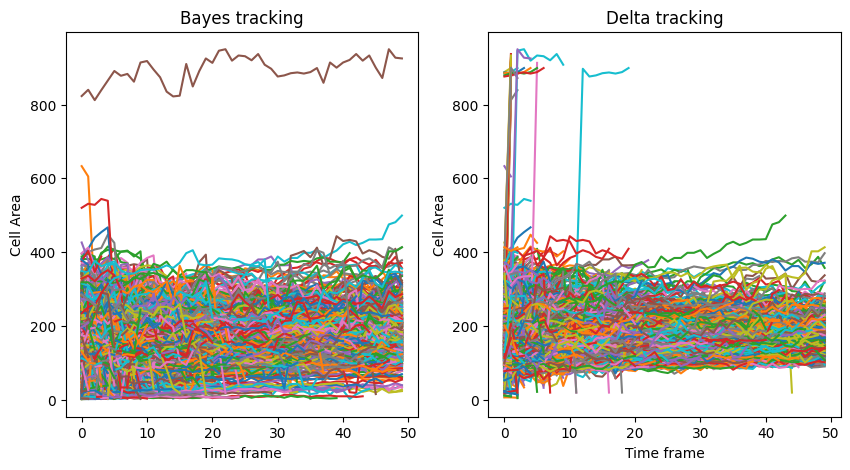

In [4]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cell_ids = np.unique(df_track_outp_bayes['trackID'])
for c in cell_ids:
    plt.plot(df_track_outp_bayes[df_track_outp_bayes['trackID'] == c].area.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')
plt.title('Bayes tracking')

plt.subplot(1,2,2)
cell_ids = np.unique(df_track_outp_delta['trackID'])
for c in cell_ids:
    plt.plot(df_track_outp_delta[df_track_outp_delta['trackID'] == c].area.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')
plt.title('Delta tracking')

## Cell length

Text(0.5, 1.0, 'Delta tracking')

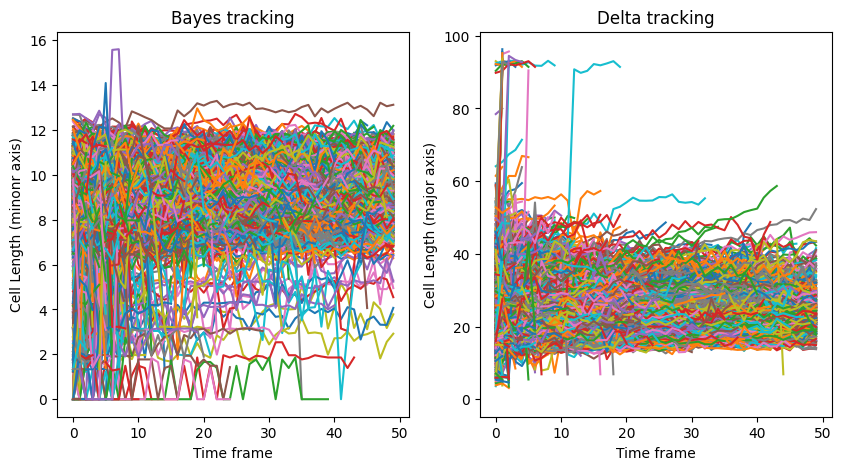

In [5]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
cell_ids = np.unique(df_track_outp_bayes['trackID'])
for c in cell_ids:
    plt.plot(df_track_outp_bayes[df_track_outp_bayes['trackID'] == c].minor_axis_length.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Length (minonr axis)')
plt.title('Bayes tracking')

plt.subplot(1,2,2)
cell_ids = np.unique(df_track_outp_delta['trackID'])
for c in cell_ids:
    plt.plot(df_track_outp_delta[df_track_outp_delta['trackID'] == c].major_axis_length.values)
plt.xlabel('Time frame')
plt.ylabel('Cell Length (major axis)')
plt.title('Delta tracking')

## Mean intensity

Text(0.5, 1.0, 'Delta tracking')

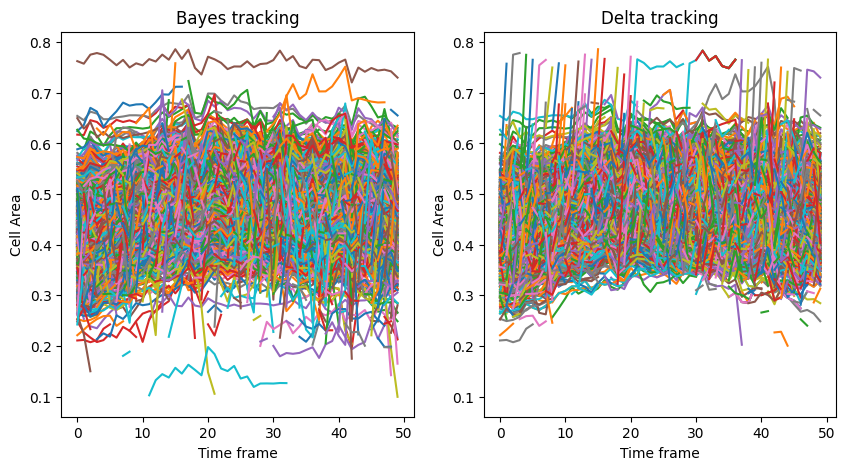

In [6]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
cell_ids = np.unique(df_track_outp_bayes['trackID'])
for c in cell_ids:
    plt.plot(df_track_outp_bayes[df_track_outp_bayes['trackID'] == c].intensity_mean)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')
plt.title('Bayes tracking')

plt.subplot(1,2,2)
cell_ids = np.unique(df_track_outp_delta['trackID'])
for c in cell_ids:
    plt.plot(df_track_outp_delta[df_track_outp_delta['trackID'] == c].intensity_mean)
plt.xlabel('Time frame')
plt.ylabel('Cell Area')
plt.title('Delta tracking')

## Lineage

Text(0.5, 0.98, 'Delta tracking')

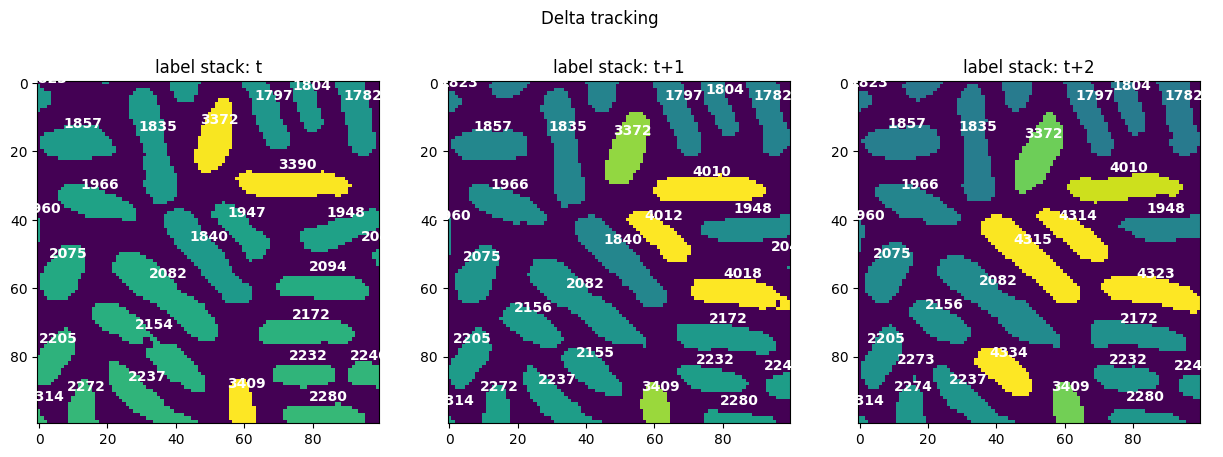

In [7]:
plt.figure(figsize = (15,5))
ax = plt.subplot(1,3,1)
img = np.array(label_stack_delta)[2][300:400,200:300]
plt.imshow(img)
plt.title('label stack: t')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,2)
img = np.array(label_stack_delta)[3][300:400,200:300]
plt.imshow(img)
plt.title('label stack: t+1')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,3)
img = np.array(label_stack_delta)[4][300:400,200:300]
plt.imshow(img)
plt.title('label stack: t+2')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
plt.suptitle('Delta tracking')

Text(0.5, 0.98, 'Bayes tracking')

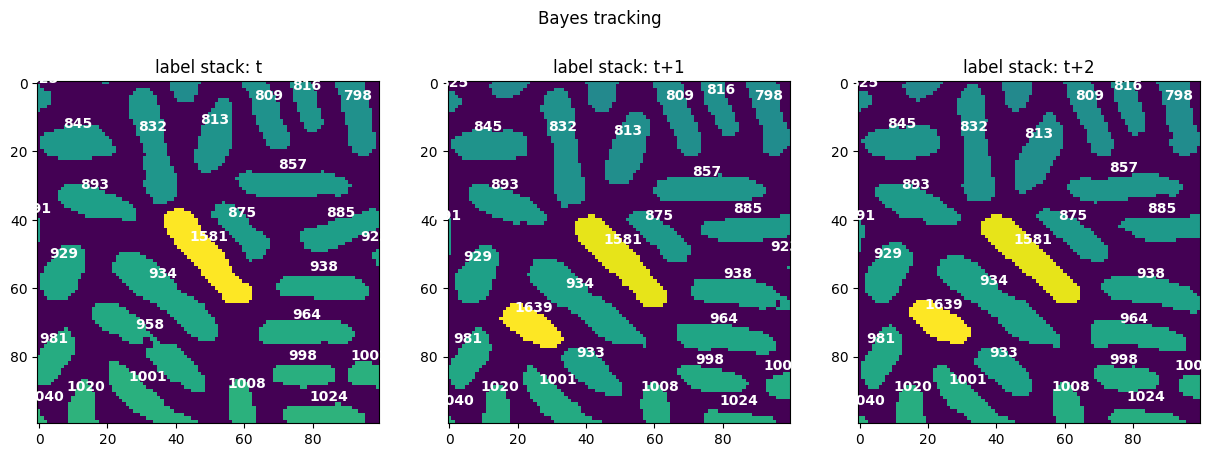

In [8]:
plt.figure(figsize = (15,5))
ax = plt.subplot(1,3,1)
img = np.array(label_stack_bayes)[2][300:400,200:300]
plt.imshow(img)
plt.title('label stack: t')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,2)
img = np.array(label_stack_bayes)[3][300:400,200:300]
plt.imshow(img)
plt.title('label stack: t+1')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
ax = plt.subplot(1,3,3)
img = np.array(label_stack_bayes)[4][300:400,200:300]
plt.imshow(img)
plt.title('label stack: t+2')

reg = regionprops(img.astype(int))
center = [r.centroid for r in reg]
labels = [r.label for r in reg]
for c, l in zip(center, labels):
    x, y = c
    x=int(np.ceil(x))
    y=int(np.ceil(y))
    ax.text(y-5,x-5, str(l), color='w', weight='bold')
    
plt.suptitle('Bayes tracking')